In [28]:
# Import libraries
import pyodc #for sql server connections
import pandas
import numpy 

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import joblib

In [15]:
# Importing the data 
csv_file = r'C:\Users\HexagonRig 2\Documents\GitHub\MLWithPython\Sample Data\mail-volume.csv'
dataframe = pandas.read_csv(csv_file)

print("Dataframe:")
print(dataframe)

Dataframe:
        time  year  month_no  Total Mail
0    1980-01  1980         1         619
1    1980-02  1980         2         593
2    1980-03  1980         3         642
3    1980-04  1980         4         642
4    1980-05  1980         5         646
..       ...   ...       ...         ...
482  2020-03  2020       483        2558
483  2020-04  2020       484         931
484  2020-05  2020       485        1633
485  2020-06  2020       486        2496
486  2020-07  2020       487        3054

[487 rows x 4 columns]


In [16]:
x = dataframe.drop(columns=['time','year','Total Mail'])
y = dataframe['Total Mail']

print(x)
print(y)

     month_no
0           1
1           2
2           3
3           4
4           5
..        ...
482       483
483       484
484       485
485       486
486       487

[487 rows x 1 columns]
0       619
1       593
2       642
3       642
4       646
       ... 
482    2558
483     931
484    1633
485    2496
486    3054
Name: Total Mail, Length: 487, dtype: int64


In [22]:
# Splitting the data for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train)
print("")
print(x_test)
print("")
print(y_train)
print("")
print(y_test)

     month_no
228       229
391       392
51         52
373       374
465       466
..        ...
127       128
361       362
417       418
99        100
315       316

[389 rows x 1 columns]

     month_no
169       170
393       394
485       486
152       153
376       377
..        ...
62         63
93         94
450       451
443       444
133       134

[98 rows x 1 columns]

228    1868
391    2866
51      724
373    2144
465    3191
       ... 
127     648
361    1810
417    3007
99      721
315    1694
Name: Total Mail, Length: 389, dtype: int64

169    1184
393    3067
485    2496
152     896
376    2543
       ... 
62      837
93      811
450    3113
443    3860
133     690
Name: Total Mail, Length: 98, dtype: int64


In [23]:
# Create regression object and train model
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [24]:
# Generate predictions
predictions = reg.predict(x_test)
predictions

array([1342.54996657, 2650.86593935, 3188.2099996 , 1243.25812935,
       2551.57410213,  746.79894324, 1663.78826345,  834.40938785,
       2312.10555354, 1231.57673673, 1295.82439611, 1757.23940437,
       2580.77758366, 1996.70795296, 2522.37062059, 1266.62091457,
       2376.35321292, 1909.09750835, 1716.35453022, 1418.47901856,
       2177.76953848,  945.38261768, 1389.27553702, 2352.99042769,
       2837.76822118, 2282.902072  , 2142.72536063, 3094.75885869,
       2539.89270951, 2697.59150981, 1868.2126342 , 1114.76281059,
        583.25944665, 2878.65309532, 1056.35584752,  962.90470661,
       2598.29967259, 2341.30903507,  372.99437959, 1792.28358221,
       1622.9033893 , 2020.07073819, 2271.22067939,  483.96760943,
       1412.63832225, 3059.71468084, 2633.34385043, 2224.49510893,
       2750.15777657, 1494.40807055, 3083.07746607,  863.61286939,
       3123.96234022, 1383.43484071, 2055.11491603, 1459.36389271,
       2995.46702147,  892.81635092,  478.12691312, 1120.60350

In [29]:
# Compare predictions
print('Coefficients: \n', reg.coef_)
print('Mean squared error %.2f' % mean_squared_error(y_test, predictions) )
print('Coefficient of dtermination %.2f' % r2_score(y_test, predictions) )

Coefficients: 
 [5.84069631]
Mean squared error 134201.78
Coefficient of dtermination 0.87


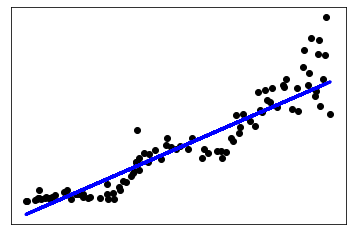

In [30]:
# Plot outputs
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, predictions, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()